In [7]:
from os import listdir
from os.path import isfile, join
import os
import pandas
import matplotlib.pyplot as plt
import numpy as np
import multiprocessing
import Pobrane.fos_reader
import re
import math
pool = multiprocessing.Pool()
os.chdir("Pobrane")
onlyfiles = [f for f in listdir(os.getcwd()) if isfile(join(os.getcwd(), f))]

In [8]:
def reader_fos(fileName):
    df = pandas.read_json(fileName, lines=True)
    fos_with_nan_and_wages = df[["fos", "year"]]
    fos_with_wages = fos_with_nan_and_wages.loc[fos_with_nan_and_wages["fos"].apply(lambda x: type(x) is not float)]
    fos_year = fos_with_wages
    fos_year["fos"] = fos_with_wages["fos"].apply(lambda row: [field["name"] for field in row])
    return fos_year

In [9]:
dblp_part_regex = re.compile("author_indexed_fos*")
part_files_filter_obj = filter(lambda file_name: dblp_part_regex.match(file_name), onlyfiles)

In [10]:
part_files = list(part_files_filter_obj)

In [11]:
list_of_dataframes = list(map(reader_fos, part_files))

In [12]:
df = pandas.concat(list_of_dataframes, ignore_index=True)

In [13]:
df

,fos,year
0,"[524, 3170, 21371, 17, 2428, 921]",2010.0
1,"[96, 177, 6981, 17, 130, 1910, 2524, 4617, 453...",2012.0
2,"[524, 271, 30562, 7950, 276, 423, 1003]",2014.0
3,"[1, 17, 12117, 765, 109, 31, 2048, 948, 9, 119]",1999.0
4,"[17372, 362, 447, 419, 17, 12519, 1188, 1501, ...",2015.0
...,...,...
4074431,"[96, 2724, 10996, 17, 10413, 330]",2008.0
4074432,"[485, 10512, 447, 276, 2681, 1923, 1159, 22070]",2015.0
4074433,"[1757, 1, 17, 9, 1374]",2007.0
4074434,"[1214, 96, 20043, 1891, 16327, 10956, 2524, 10...",2014.0


In [33]:
occurences = pandas.DataFrame(0, index=range(0, 107085), columns=range(1800, 2020) )

In [34]:
occurences

,1800,1801,1802,1803,1804,1805,1806,1807,1808,1809,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
107080,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
107081,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
107082,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
107083,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [16]:
df_filtered = df.loc[df["year"].apply(lambda year: not math.isnan(year))]

In [62]:
df_filtered

,fos,year
0,"[524, 3170, 21371, 17, 2428, 921]",2010.0
1,"[96, 177, 6981, 17, 130, 1910, 2524, 4617, 453...",2012.0
2,"[524, 271, 30562, 7950, 276, 423, 1003]",2014.0
3,"[1, 17, 12117, 765, 109, 31, 2048, 948, 9, 119]",1999.0
4,"[17372, 362, 447, 419, 17, 12519, 1188, 1501, ...",2015.0
...,...,...
4074431,"[96, 2724, 10996, 17, 10413, 330]",2008.0
4074432,"[485, 10512, 447, 276, 2681, 1923, 1159, 22070]",2015.0
4074433,"[1757, 1, 17, 9, 1374]",2007.0
4074434,"[1214, 96, 20043, 1891, 16327, 10956, 2524, 10...",2014.0


In [18]:
x = df_filtered.to_numpy()

In [23]:
df_numpy = x

In [35]:
occ_numpy = occurences.to_numpy()

In [26]:
for row in df_numpy:
    print(type(row[0][0]))
    break

<class 'str'>


In [39]:
foses_numpy = df_numpy.T[0]

In [59]:
foses_numpy_normal_type = np.array(list(map(lambda row: np.array([int(index) for index in row]), foses_numpy)))

In [51]:
years = np.array(list(map(lambda x: int(x), df_numpy.T[1])))

array([2010, 2012, 2014, ..., 2007, 2014, 2014])

In [63]:
for row in df_filtered.iterrows():
    element = row[1]
    foses = element["fos"]
    year = int(element["year"])
    for fos in foses:
        occurences.at[int(fos), int(year)] = 1 + occurences.at[int(fos), int(year)]

In [60]:
fast_proc(years, foses_numpy_normal_type, occ_numpy)

TypingError: Failed in nopython mode pipeline (step: nopython frontend)
non-precise type pyobject
[1] During: typing of argument at <ipython-input-56-9362c5b5d613> (4)

File "<ipython-input-56-9362c5b5d613>", line 4:
def fast_proc(years, foses_numpy, out_arr):
    for index in range(len(years)):
    ^

This error may have been caused by the following argument(s):
- argument 1: Unsupported array dtype: object

This error may have been caused by the following argument(s):
- argument 1: Unsupported array dtype: object


In [64]:
occurences

,1800,1801,1802,1803,1804,1805,1806,1807,1808,1809,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,0,0,0,0,0,0,0,0,0,0,...,35,34,41,53,51,60,47,48,37,1
1,0,0,0,0,0,0,0,0,0,0,...,53294,55707,58608,61927,65230,67779,73544,79121,69195,658
2,0,0,0,0,0,0,0,0,0,0,...,6,3,9,9,7,8,7,5,3,1
3,0,0,0,0,0,0,0,0,0,0,...,22292,24226,25617,27012,27596,27917,29258,29784,23553,476
4,0,0,0,0,0,0,0,0,0,0,...,1885,2020,2129,1993,2230,2322,2519,2877,1951,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
107080,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
107081,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
107082,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
107083,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [65]:
most_popular = occurences.sum(axis=1).sort_values(ascending=False)[:10]

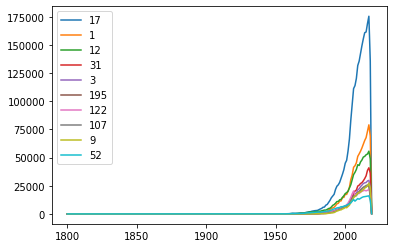

In [66]:
occurences.loc[most_popular.index].T.plot()

In [67]:
most_popular_by_year = occurences.loc[most_popular.index].T

In [68]:
latest_most_popular_by_year = most_popular_by_year.loc[range(2000, 2020)]

In [69]:
import json

with open("fos_index_map.json") as map_file:
    file = map_file.read()
    map_fos_to_int = json.loads(file)

    map_int_to_fos = {value:key for key, value in map_fos_to_int.items()} 

In [70]:
latest_most_popular_by_year.columns.map(map_int_to_fos)

Index(['Computer science', 'Artificial intelligence', 'Mathematics',
       'Machine learning', 'Mathematical optimization', 'Real-time computing',
       'Distributed computing', 'Computer vision', 'Pattern recognition',
       'Discrete mathematics'],
      dtype='object')

In [71]:
latest_most_popular_by_year.columns = latest_most_popular_by_year.columns.map(map_int_to_fos)

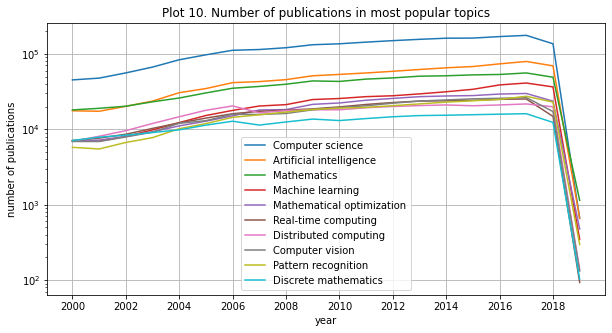

In [72]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(10, 5))
ax = latest_most_popular_by_year.plot(ax=ax, title="Plot 10. Number of publications in most popular topics")
plt.yscale("log")
ax.grid(True, which='major', axis='x' )
ax.grid(True, which='major', axis='y' )
ax.set_xlabel("year")
ax.set_ylabel("number of publications")
ax.set_xticks(range(2000, 2020, 2))